In [26]:
import pandas as pd
#load small chunk of the data
file_path = "NYPDCall_Dataset.csv"
df = pd.read_csv(file_path, nrows=200000)

In [27]:

# Inspect the dataset
print(df.info())  # Overview of columns and data types
print(df.head())  # Preview the first 5 rows
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CAD_EVNT_ID    200000 non-null  int64  
 1   CREATE_DATE    200000 non-null  object 
 2   INCIDENT_DATE  200000 non-null  object 
 3   INCIDENT_TIME  200000 non-null  object 
 4   NYPD_PCT_CD    200000 non-null  int64  
 5   BORO_NM        200000 non-null  object 
 6   PATRL_BORO_NM  200000 non-null  object 
 7   GEO_CD_X       200000 non-null  int64  
 8   GEO_CD_Y       200000 non-null  int64  
 9   RADIO_CODE     200000 non-null  object 
 10  TYP_DESC       200000 non-null  object 
 11  CIP_JOBS       200000 non-null  object 
 12  ADD_TS         200000 non-null  object 
 13  DISP_TS        200000 non-null  object 
 14  ARRIVD_TS      158768 non-null  object 
 15  CLOSNG_TS      200000 non-null  object 
 16  Latitude       200000 non-null  float64
 17  Longitude      200000 non-nul

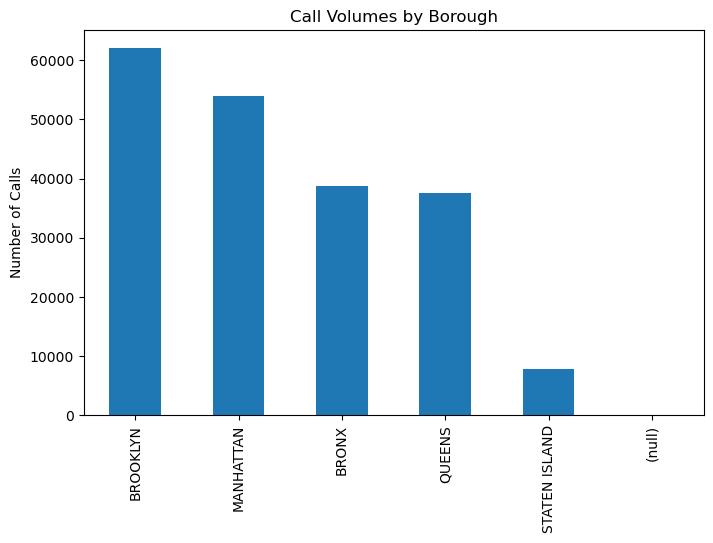

In [28]:
# Quick visualization of call volumes by borough
import matplotlib.pyplot as plt

df['BORO_NM'].value_counts().plot(kind='bar', figsize=(8, 5), title="Call Volumes by Borough")
plt.ylabel('Number of Calls')
plt.show()


Step 2

Temporal Analysis of Call Volumes
This step will help us identify when the most 911 calls are made. We'll analyze trends over time to answer questions like:

What time of day has the most calls?
Are weekends busier than weekdays?

Step 2.1: Extract Temporal Features
Extract useful time-based features from the INCIDENT_DATE or CREATE_DATE column:

Hour of the Day
Day of the Week
Month

Step 2.2: Visualize Hourly Trends
bar chart to visualize the number of calls for each hour of the day.

Step 2.3: Analyze Weekly Patterns
Examine call volumes by day of the week to identify the busiest days.

Step 2.4: (Optional) Monthly Trends
If your data spans multiple months, visualize how call volumes vary month to month.

In [29]:
#step 2.1
#extract features 


# Ensure that INCIDENT_DATE and INCIDENT_TIME are in the correct datetime format
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], format='%m/%d/%Y')
df['INCIDENT_TIME'] = pd.to_datetime(df['INCIDENT_TIME'], format='%H:%M:%S').dt.time

# Extract features from INCIDENT_DATE
df['day_of_week'] = df['INCIDENT_DATE'].dt.day_name()  # Name of the day
print(df['day_of_week'].unique())
df['month'] = df['INCIDENT_DATE'].dt.month_name()      # Name of the month

# Combine INCIDENT_DATE and INCIDENT_TIME to extract hour
df['datetime'] = pd.to_datetime(df['INCIDENT_DATE'].astype(str) + ' ' + df['INCIDENT_TIME'].astype(str))
df['hour'] = df['datetime'].dt.hour                    # Hour of the incident

# Preview extracted features
print(df[['hour', 'day_of_week', 'month']].head())

['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
   hour day_of_week     month
0    22      Sunday  December
1    22      Sunday  December
2    22      Sunday  December
3    23      Sunday  December
4    23      Sunday  December


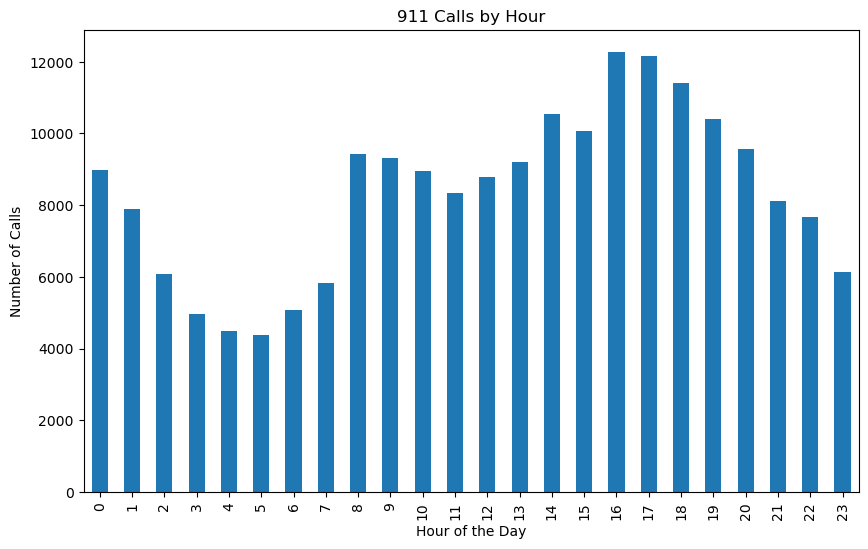

In [30]:
#step 2.2
# Plot call volumes by hour
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title="911 Calls by Hour")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()


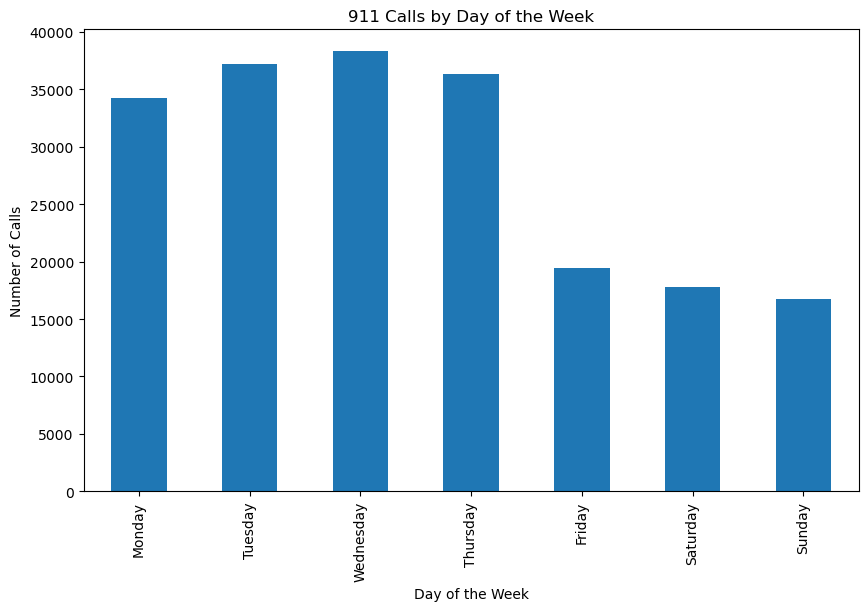

In [31]:
#step 2.3 
# Plot call volumes by day of the week
df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', figsize=(10, 6), title="911 Calls by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()


Step 3: Geospatial Analysis of Call Volumes
helps understand the geographical distribution of 911 calls. We’ll use latitude and longitude columns to identify hotspots and patterns.

Step 3.1: Basic Geospatial Overview
Inspect Latitude and Longitude Data:

Check if all rows have valid latitude and longitude values.

Filter Valid Coordinates:

Remove rows with missing or invalid latitude/longitude values.

Step 3.2: Visualize the Data on a Scatter Plot
Plot the latitude and longitude of 911 calls to get a sense of their spatial distribution.
 
Step 3.3: Map Hotspots with Folium
Use the Folium library to create an interactive map of the 911 calls.

In [36]:
#Check if all rows have valid latitude and longitude values. Remove rows with missing or invalid latitude/longitude values.
print(df[['Latitude', 'Longitude']].describe())
print(df[['Latitude', 'Longitude']].isnull().sum())

df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

            Latitude      Longitude
count  200000.000000  200000.000000
mean       40.734180     -73.929552
std         0.081513       0.074602
min        40.500391     -74.252778
25%        40.674554     -73.978638
50%        40.730969     -73.936091
75%        40.807385     -73.889823
max        40.914065     -73.700291
Latitude     0
Longitude    0
dtype: int64


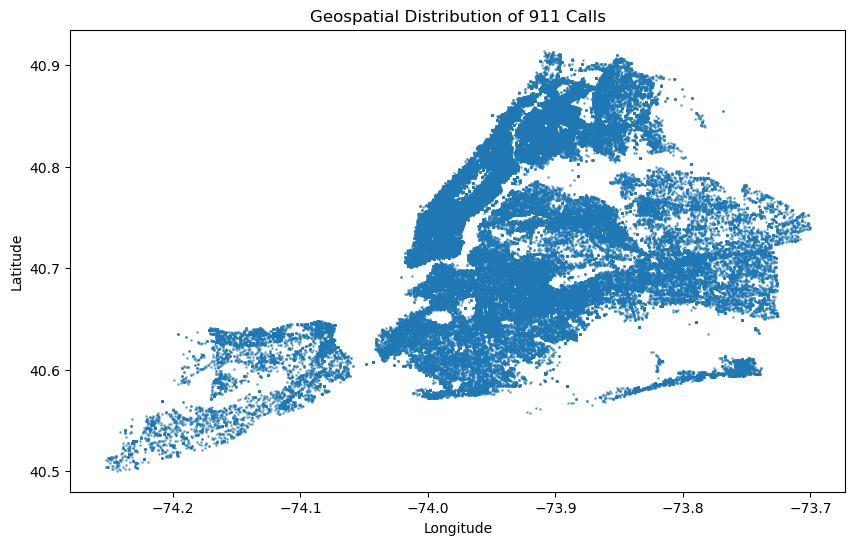

In [37]:
'''
Step 3.2: Visualize the Data on a Scatter Plot
Plot the latitude and longitude of 911 calls to get a sense of their spatial distribution.
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=1)
plt.title("Geospatial Distribution of 911 Calls")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [38]:
pip install folium
#step 3.3

     -------------------------------------- 110.5/110.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import folium
from folium.plugins import HeatMap

# Create a base map
map_911 = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color='blue',
        fill=True
    ).add_to(map_911)

# Save and display the map
map_911.save("911_calls_map.html")


Step 4: Categorize and Analyze Emergency Types
we will analyze the types of emergencies (e.g., fire, medical, police) to gain deeper insights into what kinds of calls dominate the 911 system. This step can help answer questions like:

What are the most common types of emergencies?
How do these emergencies vary across time or geography?

Step 4.1: Analyze Call Categories
Use the TYP_DESC column (or a similar column in your dataset that categorizes the calls) to identify the most common types of emergencies.

Step 4.2: Temporal Analysis of Call Types
Analyze how the most common types of emergencies vary by time of day, day of the week, or month.

Step 4.3: Geospatial Distribution of Call Types
Create geospatial maps to analyze where certain types of emergencies are more common.

Step 4.4: Combine Insights
Combine temporal, spatial, and categorical data to answer complex questions:

Are medical emergencies more common in certain boroughs?
Are fire-related emergencies more frequent during specific hours?
Do police calls dominate weekends?

In [40]:
# Count the frequency of each type
call_types = df['TYP_DESC'].value_counts()

# Display the top 10 call types
print(call_types.head(10))


VISIBILITY PATROL: DIRECTED                                  21597
STATION INSPECTION BY TRANSIT BUREAU PERSONNEL               17854
SEE COMPLAINANT: OTHER/INSIDE                                15402
TRANSIT PATROL/INSPECTION BY NON-TRANSIT BUREAU PERSONNEL     9080
AMBULANCE CASE: EDP/INSIDE                                    7058
VISIBILITY PATROL: FAMILY/HOME VISIT                          6971
TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP                      6873
INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE              6853
INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE             6701
INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER                     6254
Name: TYP_DESC, dtype: int64


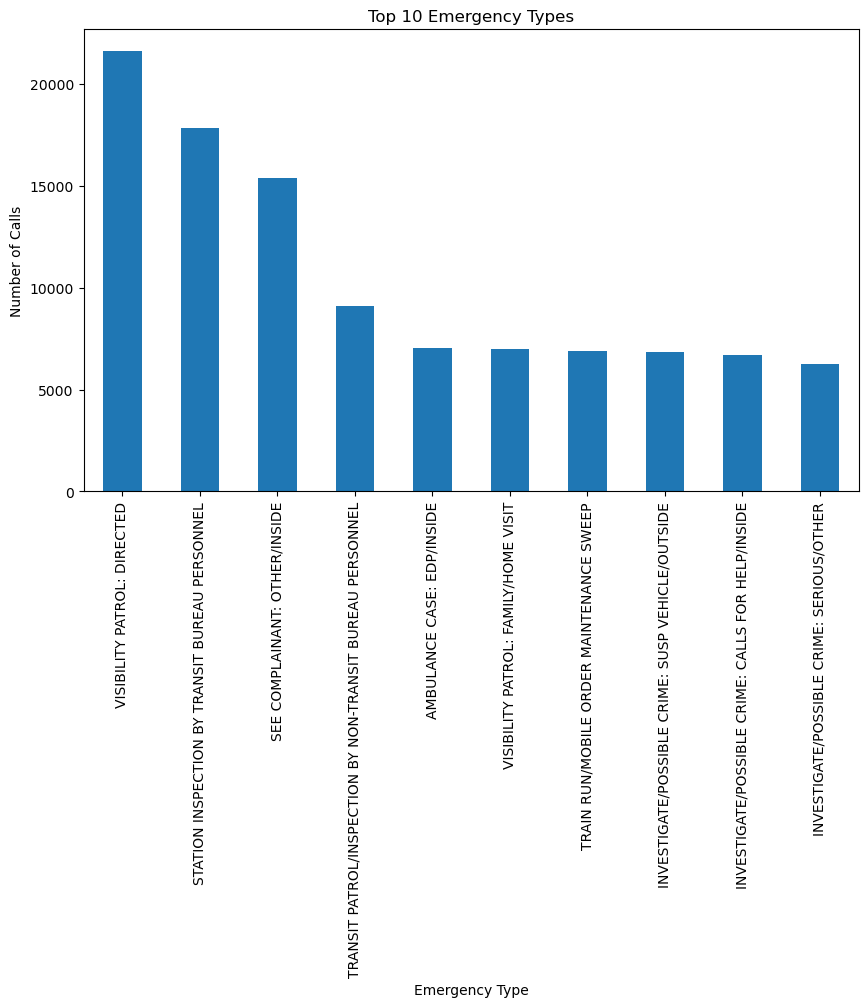

In [41]:
# Bar chart for top 10 call types
call_types.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Emergency Types")
plt.xlabel('Emergency Type')
plt.ylabel('Number of Calls')
plt.show()



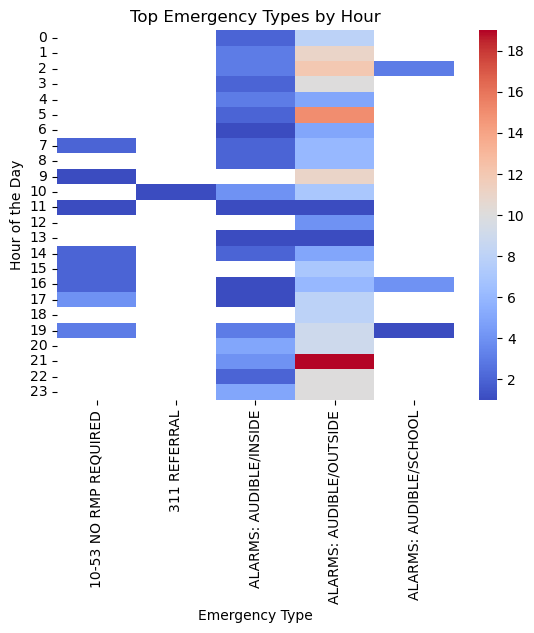

In [42]:
#4.2

# Group by hour and type
hourly_types = df.groupby(['hour', 'TYP_DESC']).size().unstack()

# Plot heatmap for top 5 emergency types
import seaborn as sns
sns.heatmap(hourly_types[hourly_types.columns[:5]], cmap="coolwarm", annot=False)
plt.title("Top Emergency Types by Hour")
plt.xlabel('Emergency Type')
plt.ylabel('Hour of the Day')
plt.show()


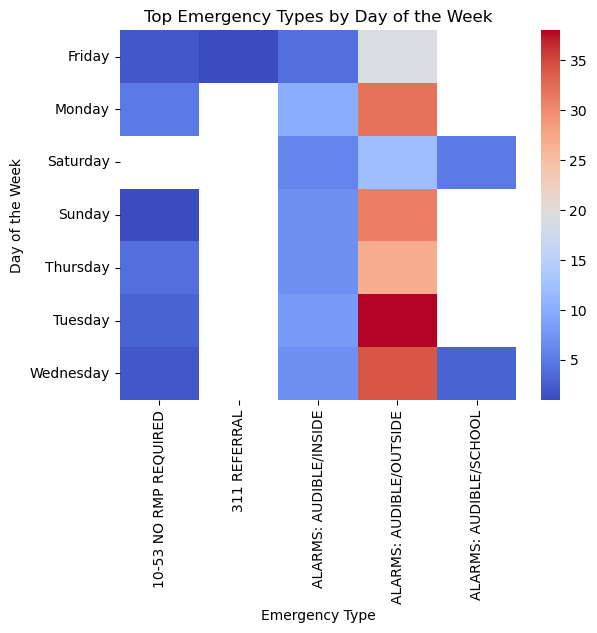

In [43]:
# Group by day of the week and type
weekly_types = df.groupby(['day_of_week', 'TYP_DESC']).size().unstack()

# Plot heatmap for top 5 emergency types
sns.heatmap(weekly_types[weekly_types.columns[:5]], cmap="coolwarm", annot=False)
plt.title("Top Emergency Types by Day of the Week")
plt.xlabel('Emergency Type')
plt.ylabel('Day of the Week')
plt.show()


In [ ]:
# Filter for a specific emergency type (e.g., "Medical Emergency")
medical_calls = df[df['TYP_DESC'] == 'MEDICAL EMERGENCY']

# Map the medical emergency calls
import folium
medical_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

for _, row in medical_calls.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True
    ).add_to(medical_map)

medical_map.save("medical_emergency_map.html")


Step 5: Build an Interactive Dashboard
An interactive dashboard can showcase all the insights you've gained from your analysis (temporal, geospatial, and categorical). It allows users to interact with the data dynamically and explore trends.

We’ll focus on Plotly Dash for this step since it’s Python-based and integrates seamlessly with your current work.

Step 5.1: Install Required Libraries
Install Dash and other dependencies:

Step 5.2: Create the Dashboard Layout
The dashboard can include:

Temporal Insights:
Hourly or weekly call trends as line/bar charts.
Geospatial Insights:
A heatmap or scatter map for call locations.
Categorical Analysis:
A bar chart for the top emergency types.

Step 5.3: Run the Dashboard

In [44]:
pip install dash pandas plotly


     ---------------------------------------- 7.8/7.8 MB 23.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
df.to_csv("updatedfile.csv", index = False)

